# Exploratory Data Analysis

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt

In [2]:
df = pd.read_csv('Coffee Shop Sales.csv')
# Add a column for day (of month)
df['day'] = pd.to_datetime(df['transaction_date']).dt.day
df

,transaction_date,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,day
0,1/1/2023,2,Lower Manhattan,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,1
1,1/1/2023,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1
2,1/1/2023,2,Lower Manhattan,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1
3,1/1/2023,1,Lower Manhattan,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1
4,1/1/2023,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1
...,...,...,...,...,...,...,...,...
149111,6/30/2023,2,Hell's Kitchen,2.50,Tea,Brewed herbal tea,Peppermint Rg,30
149112,6/30/2023,2,Hell's Kitchen,3.00,Tea,Brewed Black tea,English Breakfast Lg,30
149113,6/30/2023,1,Hell's Kitchen,3.00,Tea,Brewed herbal tea,Peppermint Lg,30
149114,6/30/2023,1,Hell's Kitchen,3.75,Coffee,Barista Espresso,Cappuccino,30


In [4]:
df.shape

(149116, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_date  149116 non-null  object 
 1   transaction_qty   149116 non-null  int64  
 2   store_location    149116 non-null  object 
 3   unit_price        149116 non-null  float64
 4   product_category  149116 non-null  object 
 5   product_type      149116 non-null  object 
 6   product_detail    149116 non-null  object 
 7   day               149116 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 9.1+ MB


In [7]:
df.isna().sum()

transaction_date    0
transaction_qty     0
store_location      0
unit_price          0
product_category    0
product_type        0
product_detail      0
day                 0
dtype: int64

In [9]:
# Predefine figsize
figsize1_1 = (8,4)
figsize1_2 = (16, 5)

## Total transaction in different stores

Text(0.5, 1.0, 'Transaction records per store')

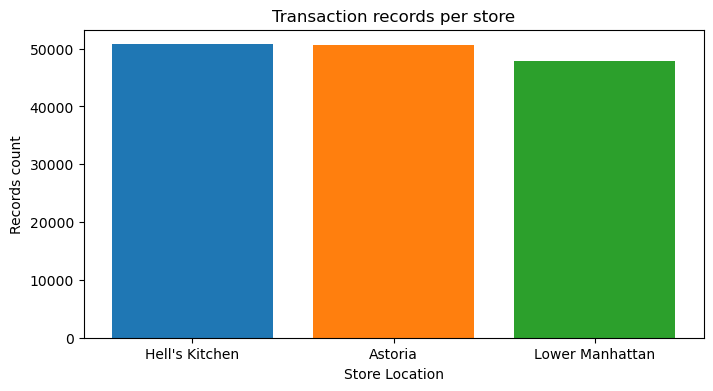

In [11]:
store_transactions = df.groupby('store_location')['transaction_qty'].count().sort_values(ascending=False)

fig9, ax0 = plt.subplots(figsize=figsize1_1)
color_trio = ['#1f77b4', '#ff7f0e', '#2ca02c']
ax0.bar(store_transactions.index, store_transactions.values, color=color_trio)

ax0.set_xlabel('Store Location')
ax0.set_ylabel('Records count')
ax0.set_title('Transaction records per store')

## Insights
- The distribution of product purchases among the three stores is near identical, indicating a balanced performance among the coffee shop branches.

# Distribution of product categories

0.028145873011615117
0.696538265511414


(array([], dtype=float64), [])

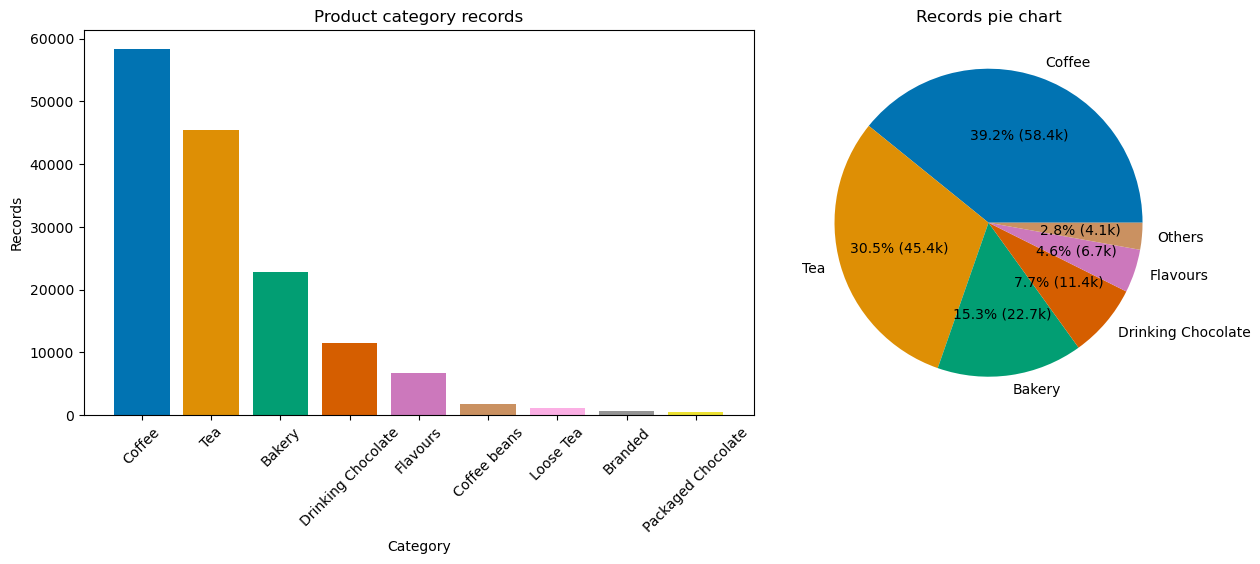

In [12]:
product_cat_distribution = df.groupby('product_category')['transaction_qty'].count().sort_values(ascending=False)
colorblind_palette = sns.color_palette("colorblind")
fig5, (ax0, ax1) = plt.subplots(1, 2, figsize=figsize1_2)
# fig5, ax1 = plt.subplots(figsize=(6,6))

ax0.bar(product_cat_distribution.index.values, product_cat_distribution, color=colorblind_palette)
ax0.set_xlabel('Category')
ax0.set_ylabel('Records')
ax0.set_title('Product category records')
ax0.xaxis.set_tick_params(rotation=45)

threshold_pie = 2 * product_cat_distribution.sum() / 100
small_portions = product_cat_distribution[product_cat_distribution < threshold_pie]
others_value = small_portions.sum()

print(others_value / product_cat_distribution.sum())
print((product_cat_distribution['Coffee']+product_cat_distribution['Tea']) / product_cat_distribution.sum())

new_distrib = product_cat_distribution.drop(small_portions.index)
new_distrib['Others'] = others_value

def autopct_format(values: pd.Series) -> str:
    """
    Arg:    values (pd.Series): portions for pie chart
    Return: my_format (str): modified string containing percentage and value count in shortened thousand
    """
    def my_format(pct):
        total = sum(values)
        ini_val = int(round(pct*total/100.0)) // 100
        val = ini_val /10
        return '{:.1f}% ({v:.1f}k)'.format(pct, v=val)
    return my_format

ax1.pie(new_distrib.values, 
        labels=new_distrib.index, 
        colors=colorblind_palette, 
        pctdistance=0.6,
        autopct=autopct_format(new_distrib))
ax1.set_title('Records pie chart')

plt.subplots_adjust(wspace=-.15)
plt.xticks(rotation=45)

### Insights
1. **Most Valuable Products**: Coffee and tea products compose 69.7% of the purchase records. 
2. **Non-performing Items**: On the other side of the distribution, coffee beans, loose tea, branded items, and packaged chocolate only constitute 2.81% of the items sold.

# Unit price for different categories

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Coffee'),
  Text(1, 0, 'Tea'),
  Text(2, 0, 'Drinking Chocolate'),
  Text(3, 0, 'Bakery'),
  Text(4, 0, 'Flavours'),
  Text(5, 0, 'Loose Tea'),
  Text(6, 0, 'Coffee beans'),
  Text(7, 0, 'Packaged Chocolate'),
  Text(8, 0, 'Branded')])

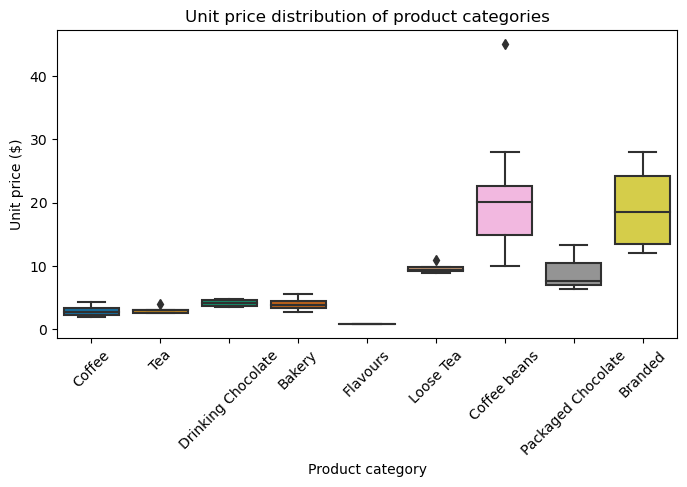

In [13]:
unique_prices = df.drop_duplicates(subset=['product_category', 'unit_price'])

fig, ax = plt.subplots(figsize=figsize1_1)

sns.boxplot(x='product_category', y='unit_price', data=unique_prices, palette=colorblind_palette)

ax0.set_xlabel('Product category')
ax0.set_ylabel('Unit price ($)')
ax0.set_title('Unit price distribution of product categories')

plt.xlabel('Product category')
plt.ylabel('Unit price ($)')
plt.title('Unit price distribution of product categories')
plt.xticks(rotation=45)


## Popular Menu

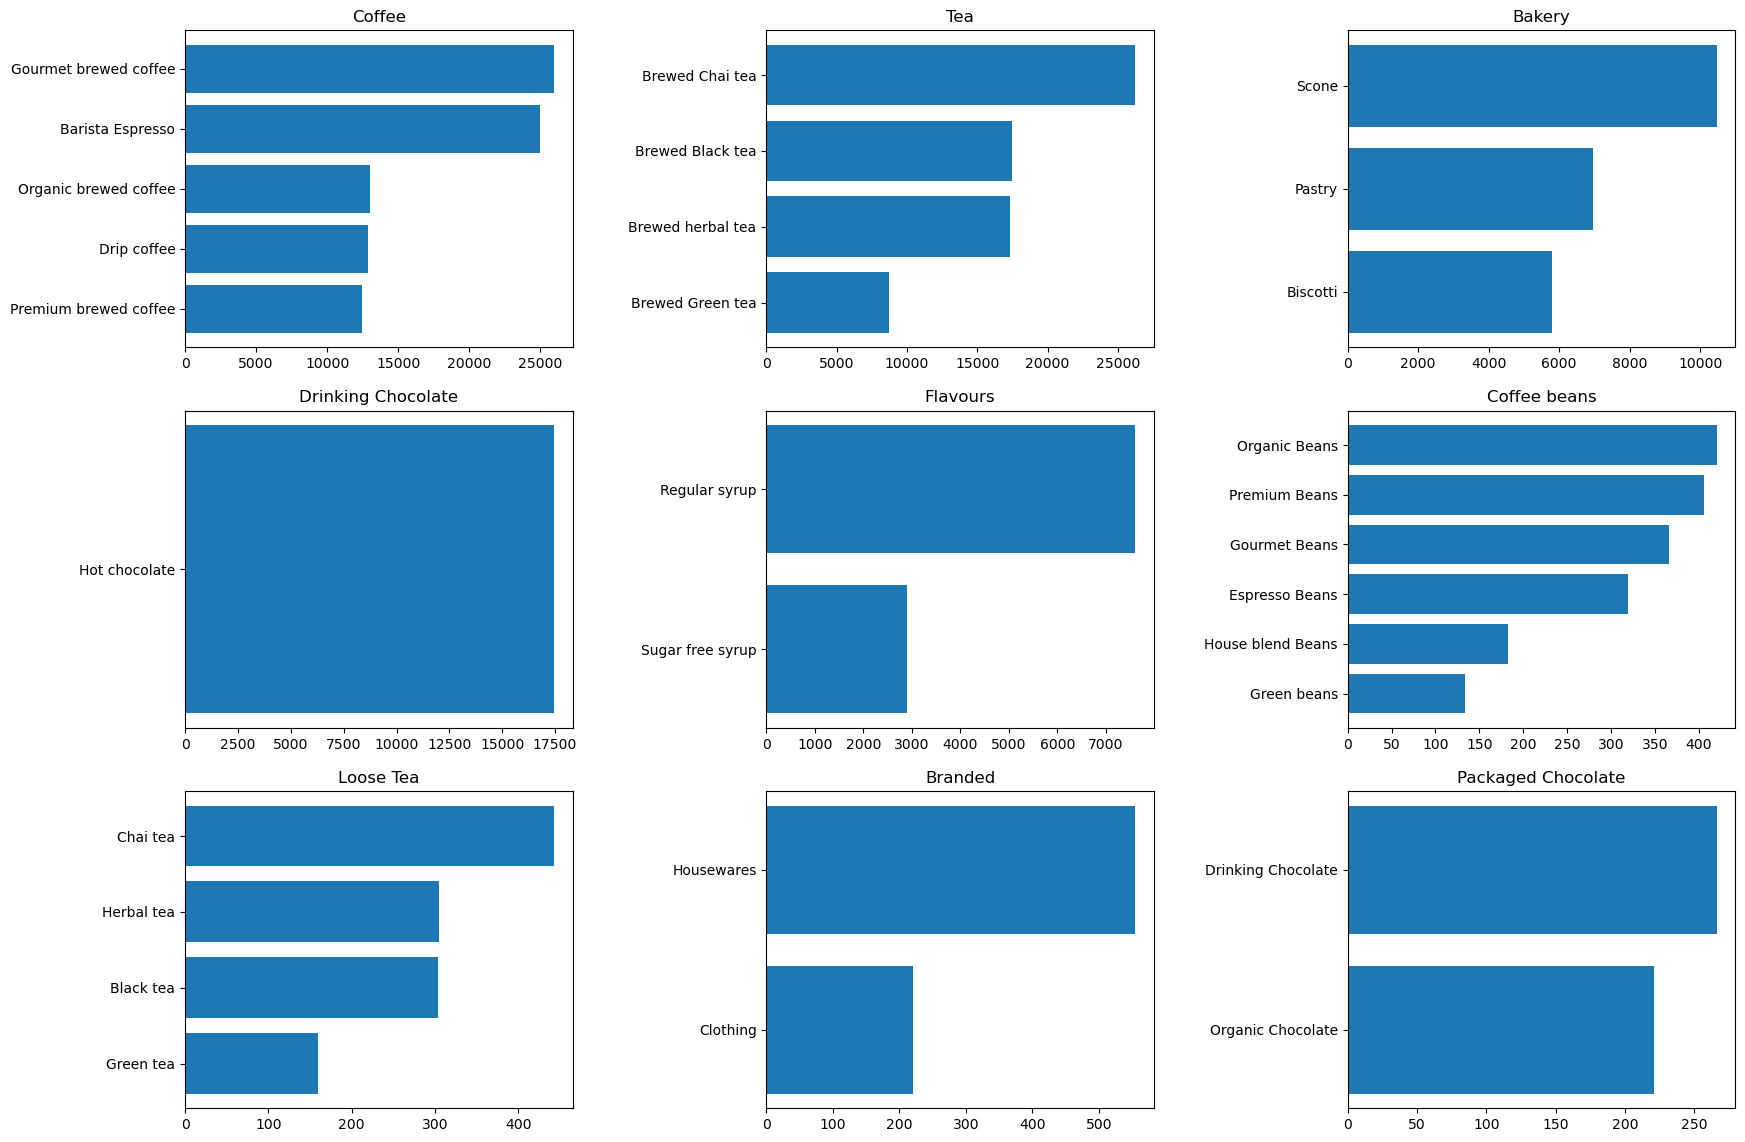

In [15]:
categories_list = list(product_cat_distribution.index)

fig, axes = plt.subplots(3, 3, figsize = (20,14))

for i, cat in enumerate(categories_list):
    cat_df = df[df['product_category']==cat]
    cat_df = cat_df[['transaction_qty', 'product_category', 'product_type']]
    cat_type_aggsum = cat_df.groupby('product_type')['transaction_qty'].sum().sort_values()
    axes[i//3, i%3].barh(width=cat_type_aggsum.values, y=cat_type_aggsum.index)
    axes[i//3, i%3].set_title(cat)

fig.subplots_adjust(wspace=0.5)

# Time-series analysis of sales and purchases
## Sales and purchases (number of transactions)

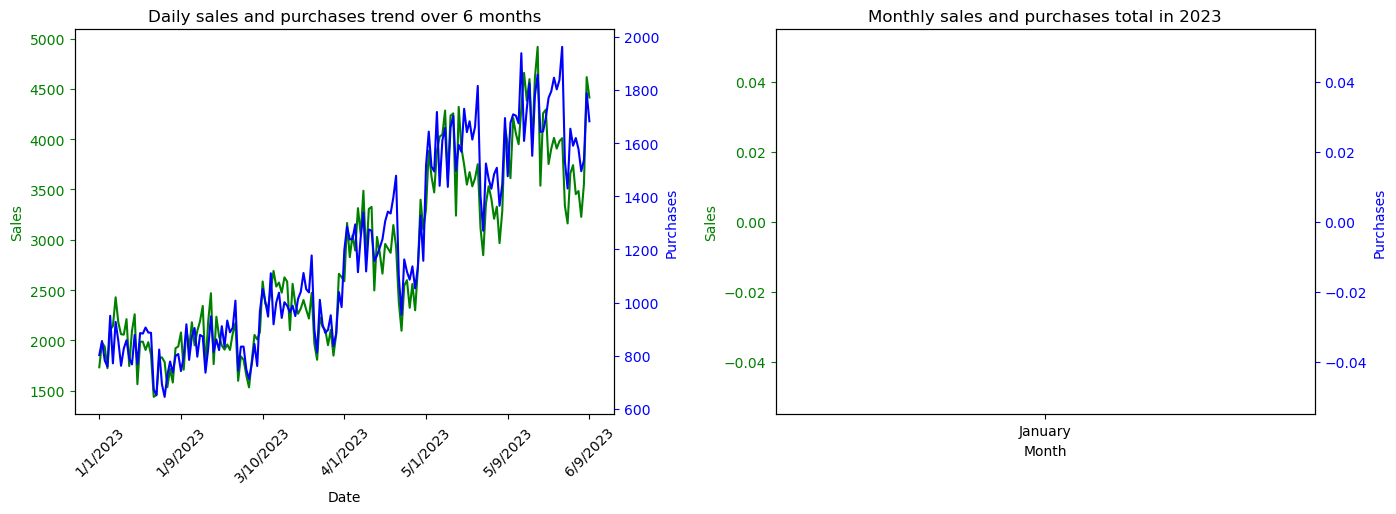

In [19]:
daily_sales = df.groupby('transaction_date')['unit_price'].sum()
daily_purchase = df.groupby('transaction_date')['transaction_qty'].sum()

monthly_sales = df.groupby('day')['unit_price'].sum()
monthly_sales = monthly_sales.reindex(index=['January', 'February', 'March', 'April', 'May', 'June'])
monthly_purchase = df.groupby('day')['transaction_qty'].sum()
monthly_purchase = monthly_purchase.reindex(index=['January', 'February', 'March', 'April', 'May', 'June'])

fig0, (ax0, ax2) = plt.subplots(1, 2, figsize=figsize1_2)

font_large = 16
font_med = 14

# Plotting the trends
ax1 = ax0.twinx()
ax0.plot(daily_sales.index, daily_sales, color='green')
ax1.plot(daily_purchase.index, daily_purchase, color='blue')

# Customize figure
ax0.set_xticks(ax0.get_xticks()[::30])  # Show only every 30th label (monthly)
ax0.set_xlabel('Date')
ax0.set_ylabel('Sales', color='green')
ax0.tick_params('x', rotation=45)
ax0.tick_params('y', colors='green')
ax1.set_ylabel('Purchases', color='blue')
ax1.tick_params('y', colors='blue')
ax0.set_title('Daily sales and purchases trend over 6 months')

# Plotting the trends
ax3 = ax2.twinx()
ax2.bar(monthly_sales.index, monthly_sales, color='lightgreen', edgecolor='lightgreen')
ax3.bar(monthly_purchase.index, monthly_purchase, color='none', edgecolor='blue')

# Customize figure
ax2.set_xlabel('Month')
ax2.set_ylabel('Sales', color='green')
ax2.tick_params('y', colors='green')
ax3.set_ylabel('Purchases', color='blue')
ax3.tick_params('y', colors='blue')
ax2.set_title('Monthly sales and purchases total in 2023')

plt.subplots_adjust(wspace=0.3)
plt.title
plt.show()

### Insights
1. **Daily Sales Trend**: The fluctuations in sales and purchases may have been affected by days of the week, holidays, or marketing promotions. Another thing I noticed is the consistent dip in every near-end/start of the month. Over the provided period, the sales have found an increase, indicative of continuous business growth.

# Multivariate Analysis
## Product category performance across each store

Text(0.5, 1.0, 'Distribution of each product category purchased per store')

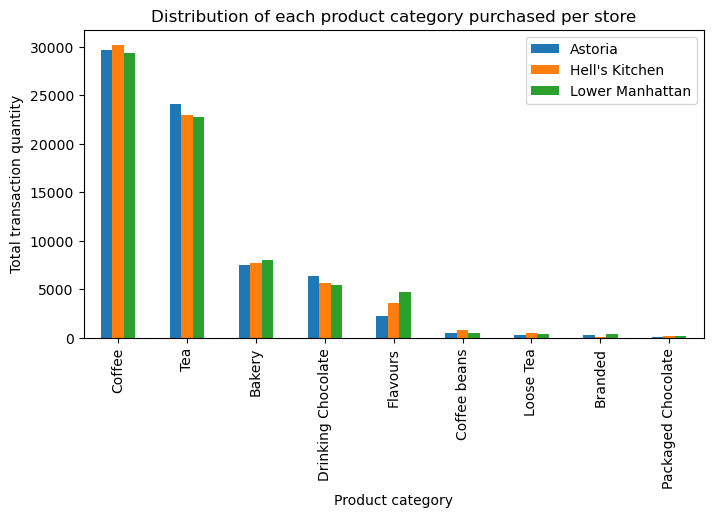

In [20]:
pivot_df = df.pivot_table(index='product_category', columns='store_location', values='transaction_qty', aggfunc='sum')

# Reset index to convert product_category from index to a regular column
pivot_df.reset_index(inplace=True)

# Extract the 'product_category' column as a separate Series
product_category_column = pivot_df['product_category']

# Drop the 'product_category' column from the DataFrame
pivot_df.drop(columns=['product_category'], inplace=True)

# Concatenate the 'product_category' column back to the DataFrame as the first column
# Removes store_location column
pivot_df = pd.concat([product_category_column, pivot_df], axis=1)

index_list = product_cat_distribution.index.tolist()
store_prod_cat = pivot_df.set_index('product_category').reindex(index_list)

store_prod_cat.plot(figsize=figsize1_1, kind='bar')

plt.xlabel('Product category')
plt.ylabel('Total transaction quantity')
plt.title('Distribution of each product category purchased per store')

## Correlation plot
We're including the correlation matrix early in this EDA to confirm the relationship between `transaction_qty` and `unit_price`, along with other relevant quantitative variables.

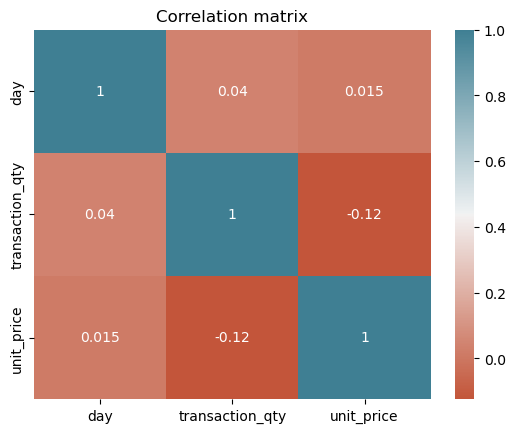

In [25]:
correl_data = df[['day', 'transaction_qty', 'unit_price']]
correl_matrix = correl_data.corr()

fig1, ax0 = plt.subplots()

palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(correl_matrix, annot=True, cmap=palette)
plt.title('Correlation matrix')
plt.show()

The heatmap show the correlation between the variables transaction quantity, total bill, and unit price.

# Key Takeaways
1. The coffee shop business is continuously growing over the 6-month period.
2. Monthly sales reveal a pattern of a slight increase in sales per transaction for days 21 to 26 every month.
3. In terms of weeks, Monday and Fridays have the best average daily sales, while Sunday and Tuesday have the less performing average daily sales.
4. Hours 8 to 10 are the busiest ordering times at the cafe (along with revenue), while hours 11 to 19 have a moderate level of activity. Through clock-scheduled promotions, these busy hours can be further capitalized on or the moderate hours can be boosted into more balance of hourly performance.
5. Coffee and tea collectively contribute to 74% of the total income, whereas items not intended for immediate consumption constitute only 2% of the overall revenue.
6. The items not for immediate consumption also happen to be the most expensive items, while the rest of the product categories have more affordable prices. A change of roster or marketing promotions for the stock items might improve the performance of these items. 
7. Regular and Large are the most preferred drink sizes. 
8. Transactions generally come in one or two purchases.
9. The three store locations have similar levels of selling performance.